In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('qr_bench_result.txt', 'r') as f:
    text = f.read()

sections = {
    "Tall Skinny": r"Testing tall skinny matrices:(.*?)Testing square matrices:",
    "Square": r"Testing square matrices:(.*?)Testing wide matrices:",
    "Wide": r"Testing wide matrices:(.*?)Testing small matrices:",
    "Small": r"Testing small matrices:(.*)"
}

In [6]:
def parse_section(text, pattern):
    match = re.search(pattern, text, re.DOTALL)
    if not match:
        return pd.DataFrame()

    section_text = match.group(1)
    lines = [line.strip() for line in section_text.strip().splitlines() if line.strip()]
    
    data = []
    current_size = ""
    for line in lines:
        if line.startswith("Matrix size:"):
            current_size = line.split(":")[1].strip()
        else:
            solver, time = line.split(":")
            data.append({
                "Matrix Size" : current_size,
                "Solver" : solver.strip(),
                "Time (s)": float(time.strip().replace("s", "").replace("e", "E"))
            })
    
    return pd.DataFrame(data)

In [7]:
# Parse all sections into DataFrames
df_tall_skinny = parse_section(text, sections["Tall Skinny"])
df_square = parse_section(text, sections["Square"])
df_wide = parse_section(text, sections["Wide"])
df_small = parse_section(text, sections["Small"])

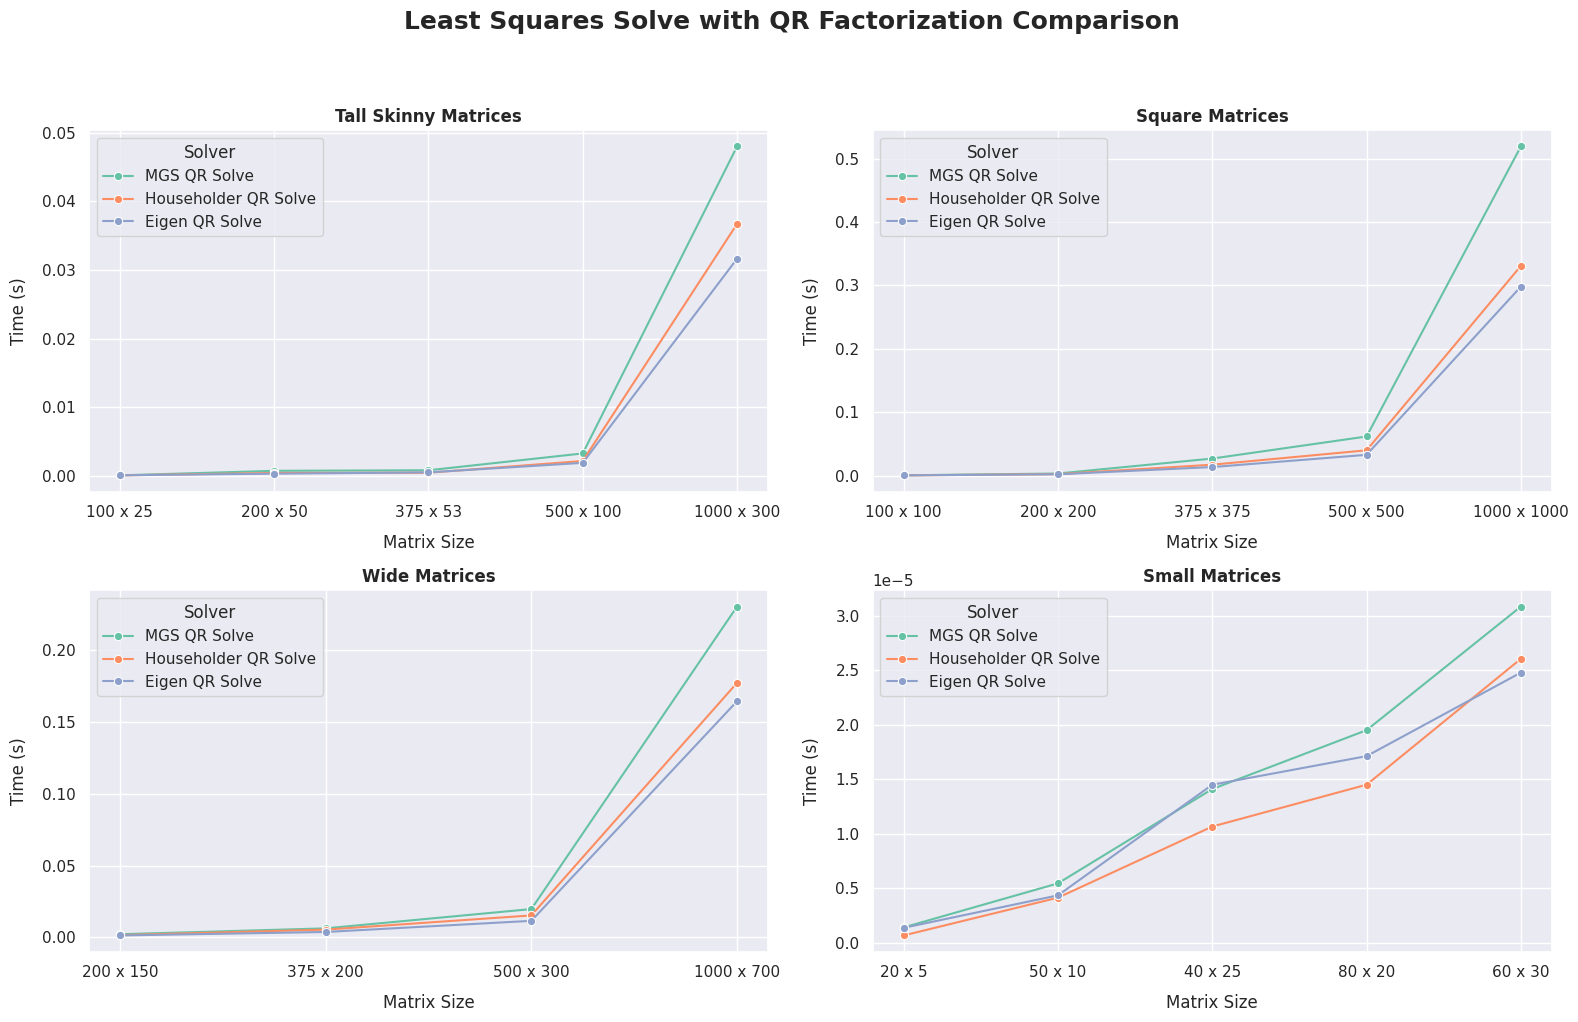

In [24]:
dfs = {
    "Tall Skinny": df_tall_skinny,
    "Square": df_square,
    "Wide": df_wide,
    "Small": df_small
}

# Set the style for beauty
sns.set_theme(style="darkgrid")

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Least Squares Solve with QR Factorization Comparison",
             fontsize=18, weight='bold', y=1.02)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each matrix type
for ax, (title, df) in zip(axes, dfs.items()):
    # Convert matrix size to string format for x-axis labels
    df["Matrix Size"] = df["Matrix Size"].astype(str)

    # Pivot the data for plotting (Matrix Size as x, Solver as hue)
    sns.lineplot(
        data=df,
        x="Matrix Size",
        y="Time (s)",
        hue="Solver",
        marker="o",
        ax=ax,
        palette="Set2"
    )

    ax.set_title(f"{title} Matrices", weight='bold')
    ax.set_xlabel("Matrix Size", labelpad=10)
    ax.set_ylabel("Time (s)", labelpad=10)
    ax.tick_params(axis='x')
    ax.legend(title="Solver")

# Tight layout with space for main title
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()